<a href="https://colab.research.google.com/github/descobargarcia/ingenieria-quimica/blob/colab_import/01_Calculo_Propiedades_Agua_IAPWS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CÁLCULO Y VISUALIZACIÓN DE PROPIEDADES TERMODINÁMICAS DEL AGUA EN PYTHON**

El agua es un componente presente en la mayoría de los procesos industriales químicos, ya que suele utilizarse tanto para los servicios de calentamiento (fase vapor) como los de enfriamiento (fase líquida). Por lo tanto, resulta importante calcular con exactitud sus propiedades termodinámicas y conocer su comportamiento de fases. Sin embargo, es un componente difícil de modelar para las ecuaciones de estado comunes, por lo cual requiere sus propios modelos termodinámicos. En ese sentido, se utilizan como principal referencia las formulaciones termodinámicas desarrollados por la [IAPWS](http://iapws.org/index.html) (International Association for the Properties of Water and Steam), siendo las más recientes la IAPWS-95 para uso científico y la IAPWS-IF97 para uso industrial.

Las ecuaciones de estos modelos son muy complejas, lo cual dificulta programarlas de forma particular en aplicaciones como Excel para calcular tablas de propiedades termodinámicas. Existen varias implementaciones en software, pero son de licencia paga. Afortunadamente, también existe una implementación de licencia libre en Python. Este lenguaje de programación es muy fácil de usar por su sintaxis sencilla, y se aplica mucho en la actualidad para ciencia de datos. Además, permite desarrollar programas que luego pueden integrarse en otros entornos. Por ejemplo, el simulador de uso gratuito DWSIM acepta scripting de Python.

En esta publicación, veremos cómo utilizar en Python la librería [iapws](https://iapws.readthedocs.io/en/latest/) para definir un estado termodinámico del agua y calcular sus propiedades. Además, utilizaremos librerías de ciencia de datos como [NumPy](https://numpy.org/doc/), [pandas](https://pandas.pydata.org/docs/) y [Matplotlib](https://matplotlib.org/) para extender los cálculos a muchos puntos y visualizar los resultados como tablas y diagramas.

## Librería `iapws`

La librería `iapws` es una implementación en Python de las formulaciones estándar de la IAPWS (http://www.iapws.org/release.html).

- **Autor**: Juan José Gómez Romera (<jjgomera@gmail.com>)
- **Licencia**: GPL-3
> "Esta licencia de derecho de autor ampliamente usada en el mundo del software libre y código abierto, y garantiza a los usuarios finales (personas, organizaciones, compañías) la libertad de usar, estudiar, compartir (copiar) y modificar el software". *Fuente*: https://es.wikipedia.org/wiki/GNU_General_Public_License
- **Documentación**: http://iapws.readthedocs.io/
- **Repositorio**: https://github.com/jjgomera/iapws


Para utilizar la librería, primero debemos instalarla:

In [1]:
!pip install iapws

Para trabajar con la formulación IAPWS-IF97, debemos **importar** el módulo `IAPWS97` de la librería `iapws`:

In [2]:
from iapws import IAPWS97

A continuación, se muestra una lista de algunas propiedades que podemos utilizar en este módulo, así como sus respectivas unidades:

| Variable | Propiedad           | Unidades  |
|:--------:|:-------------------:|:---------:|
|P         | Presión             | MPa       |
|T         | Temperatura         | K         |
|v         | Volumen específico  | m3/kg     |
|h         | Entalpía específica | kJ/kg     |
|s         | Entropía específica | kJ/(kg.K) |
|x         | Calidad de vapor    | ---       |

Estas unidades aplican siempre, tanto para las propiedades especificadas como las calculadas.

**Indicaciones para el uso del módulo `iapws.IAPWS97`**

- El módulo aplica el paradigma de _Programación Orientada a Objetos_ (POO): primero, debemos crear un estado termodinámico (especificando 2 propiedades) como un objeto; luego, consultamos las demás propiedades calculadas
- Región de 2 fases (equilibrio líquido - vapor):
    - Especificaciones válidas
        - `(T, x)`
        - `(P, x)`
    - La fracción de vapor `x` debe estar comprendida entre `0` (líquido saturado) y `1` (vapor saturado).
- Regiones de 1 fase (vapor sobrecalentado o líquido comprimido):
    - Especificaciones válidas
        - `(T, P)`
        - `(P, h`)
        - `(P, s)`
        - `(h, s)`
- Si intentamos crear un estado termodinámico con alguna especificación "no válida", surgirá un error (`AttributeError`) luego al intentar acceder a sus propiedades

**Ejemplo 1**: Vapor saturado a 100ºC
- Vapor saturado → **x = 1**
- T = 100 ºC = (100 + 273.15) K → **T = 373.15 K**

In [3]:
# Estado termodinámico (especif.)
estado_1 = IAPWS97(T=373.15, x=1)
# Cálculo de propiedades
P1 = estado_1.P
v1 = estado_1.v
h1 = estado_1.h
s1 = estado_1.s
# Estado de agregación
fase = estado_1.phase
# Imprimiendo resultados
print(f"{P1 = :.6f} \t MPa")
print(f"{v1 = :.5f} \t m3/kg")
print(f"{h1 = :.2f} \t kJ/kg")
print(f"{s1 = :.5f} \t kJ/(kg.K)")
print(f"{fase = }")

P1 = 0.101418 	 MPa
v1 = 1.67186 	 m3/kg
h1 = 2675.57 	 kJ/kg
s1 = 7.35408 	 kJ/(kg.K)
fase = 'Vapour'


**Ejemplo 2:** Vapor sobrecalentado a 2.5 MPa y 300ºC
- **P = 2.5 MPa**
- T = (300 + 273.15) K → **T = 573.15 K**

In [4]:
# Estado termodinámico (especif.)
P2 = 2.5    # MPa
T2 = 573.15 # K
estado_2 = IAPWS97(P=2.5, T=573.15)
# Cálculo de propiedades
v2 = estado_2.v
h2 = estado_2.h
s2 = estado_2.s
x2 = estado_2.x
# Estado de agregación
fase = estado_2.phase
# Imprimiendo resultados
print(f"{v2 = :.6f} m3/kg")
print(f"{h2 = :.2f} kJ/kg")
print(f"{s2 = :.6f} kJ/(kg.K)")
print(f"{x2 = }")
print(f"{fase = }")

v2 = 0.098932 m3/kg
h2 = 3009.63 kJ/kg
s2 = 6.645958 kJ/(kg.K)
x2 = 1
fase = 'Vapour'


Si nos interesa el cálculo de una propiedad en particular,
se puede *encapsular* en una función propia. A continuación, se muestran 2 ejemplos de funciones que reutilizaremos más adelante:

In [5]:
def calc_v_TP(T: float, P: float) -> float:
    """Calcula el volumen específico `v` (m3/kg) del agua,
    a partir de su temperatura `T` (K) y presión `P` (MPa)"""
    estado = IAPWS97(T=T, P=P)
    return estado.v

v2 = calc_v_TP(T2, P2)
print(f"{v2 = :.6f} m3/kg")

v2 = 0.098932 m3/kg


In [6]:
def id_fase_TP(T: float, P: float) -> float:
    """Identifica la fase del agua, a partir de su temperatura `T` (K)
    y presión `P` (MPa)"""
    estado = IAPWS97(T=T, P=P)
    return estado.phase

fase = id_fase_TP(T2, P2)
print(f"{fase = }")

fase = 'Vapour'


## Librería `NumPy`

`NumPy` es una librería de Python que facilita el manejo eficiente de arreglos numéricos y cálculos matemáticos, siendo útil para tareas como análisis de datos, computación científica y desarrollo de algoritmos numéricos.

Para usar esta librería, debemos importarla:

In [7]:
import numpy as np

Anteriormente, vimos cómo obtener las propiedades termodinámicas para un punto. Ahora queremos calcular una **isoterma** (línea de puntos a temperatura constante) para un **diagrama Pv**.

En un primer enfoque, crearemos un conjunto de puntos linealmente equiespaciados en presión, mediante el comando `linspace`. Luego, calcularemos el volumen y verificaremos la fase de cada punto, almacenando los resultados en arreglos de datos (`arrays`).

In [8]:
T1 = 373.15 # K
n_dat = 19
P_min = 0.01 # MPa
P_max = 0.10 # MPa
presiones = np.linspace(P_min, P_max, n_dat)
volumenes_T1 = np.array([calc_v_TP(T1, P) for P in presiones])
fases_T1 = np.array([id_fase_TP(T1, P) for P in presiones])

Antes de avanzar con la representación gráfica, deberíamos inspeccionar los resultados. En ese sentido, la librería `pandas` es muy útil.

## Librería `pandas`

La librería de Python `pandas` está diseñada para la manipulación y análisis de datos tabulares, permitiendo cargar, limpiar, transformar y analizar datos de manera sencilla y eficiente. Esto resulta especialmente útil para trabajos con conjuntos de datos estructurados, como hojas de cálculo o bases de datos.

Para utilizarla, necesitamos primero importarla:

In [9]:
import pandas as pd

Para generar nuestra tabla, primero debemos estructurar los datos como un diccionario `{clave: valor}`. Las "claves" serán los encabezados de las columnas, mientras que los "valores" serán los arreglos de datos respectivos. A partir del diccionario, podemos construir luego un `DataFrame` de `pandas`, que podremos visualizar como una tabla.

A continuación, se muestra el procedimiento:

In [10]:
isoterma_T1 = {
    'P (MPa)': presiones,
    'v (m3/kg)': volumenes_T1,
    'Fase': fases_T1,
    }
pd.DataFrame(isoterma_T1)

,P (MPa),v (m3/kg),Fase
0,0.010,17.196725,Vapour
1,0.015,11.456053,Vapour
2,0.020,8.585687,Vapour
3,0.025,6.863445,Vapour
4,0.030,5.715264,Vapour
5,0.035,4.895117,Vapour
6,0.040,4.279992,Vapour
7,0.045,3.801549,Vapour
8,0.050,3.418781,Vapour
9,0.055,3.105597,Vapour


Analizando los resultados, observamos que:
1. Al aumentar `P`, disminuye `v`
2. Todos los puntos se encuentran en la fase vapor.

Para la isoterma elegida (100 ºC), es bien conocido que su $P^{sat}$ es 1 atm (0.101325 MPa).

Como el rango utilizado de `P` (0.01 - 0.10 MPa) es inferior a la $P^{sat}$, el estado de agregación tiene que ser vapor sobrecalentado. Para esta fase, lo esperado es que el volumen sea inversamente proporcional a la presión.

Por tanto, los resultados parecen correctos.

## Vectorización de funciones

Hasta ahora, obtuvimos un arreglo de volúmenes iterando nuestra función `calc_v_TP` sobre un arreglo de presiones. Sin embargo, las funciones de `NumPy` permiten trabajar de forma más directa, ya que pueden aplicarse sobre arreglos y retornar arreglos (siempre y cuando las dimensiones sean compatibles).

¿Se puede lograr esto con funciones propias? Sí: utilizando el comando `vectorize`, podemos transformar una función común de Python (propia o externa) en una función de NumPy. Esta característica es muy útil, especialmente cuando se procesan muchos datos (más adelante, necesitaremos calcular cientos o miles de valores).


In [11]:
# Vectorización de funciones
calc_volumenes_isoterma = np.vectorize(calc_v_TP)
id_fases_isoterma = np.vectorize(id_fase_TP)
# Cálculo de propiedades para la isoterma T1
volumenes_T1 = calc_volumenes_isoterma(T1, presiones)
fases_T1 = id_fases_isoterma(T1, presiones)

Para confirmar que las nuevas funciones vectorizadas trabajan correctamente, creamos otro `DataFrame` de `pandas` con los "nuevos" resultados.

In [12]:
# Representación tabular
isoterma_T1 = {
    'P (MPa)': presiones,
    'v (m3/kg)': volumenes_T1,
    'fases': fases_T1,
    }
pd.DataFrame(isoterma_T1)

,P (MPa),v (m3/kg),fases
0,0.010,17.196725,Vapour
1,0.015,11.456053,Vapour
2,0.020,8.585687,Vapour
3,0.025,6.863445,Vapour
4,0.030,5.715264,Vapour
5,0.035,4.895117,Vapour
6,0.040,4.279992,Vapour
7,0.045,3.801549,Vapour
8,0.050,3.418781,Vapour
9,0.055,3.105597,Vapour


Puede comprobarse que los resultados son idénticos a la celda 10.

## Librería `Matplotlib`

`Matplotlib` es una librería de visualización en Python que permite crear gráficos de alta calidad, como diagramas de dispersión, histogramas, gráficos de barras y más. Se ha vuelto una herramienta esencial para representar y comunicar datos de manera efectiva.

A continuación, procedemos a importar la librería y configurarla para el ambiente de trabajo:

In [13]:
%matplotlib inline
import matplotlib.pyplot as plt

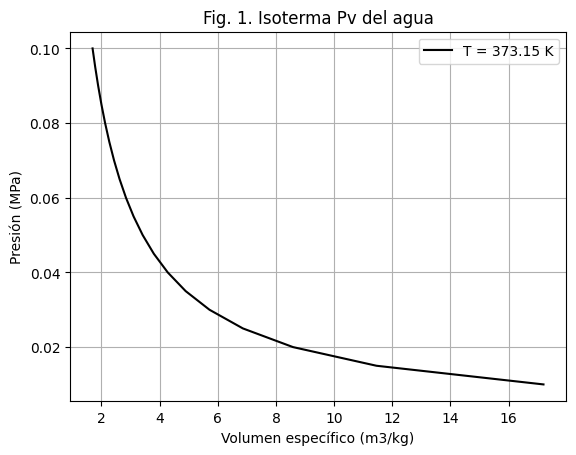

In [14]:
# Graficando isoterma T1: diagrama Pv
plt.title("Fig. 1. Isoterma Pv del agua")
plt.xlabel("Volumen específico (m3/kg)")
plt.ylabel("Presión (MPa)")
plt.plot(volumenes_T1, presiones, "-k", label="T = 373.15 K")
plt.grid(True) # cuadriculado
plt.legend()
plt.show()

**Observaciones**
- La isoterma anterior sólo cubre la región de vapor sobrecalentado.
- Para incluir la fase líquida y la transición de equilibrio, se necesita un rango de presiones más amplio.
- Conviene un escalado logarítmico para las presiones, tanto para los cálculos como la visualización.

In [15]:
# Cálculo de la isoterma T1 ampliada
T1 = 373.15 # K
n_dat = 200
# P_min = 0.01 MPa (10^-2)  -> start = -2
# P_max = 10.0 MPa (10^1)   -> stop = 1
presiones = np.logspace(start=-2, stop=1, num=n_dat)
volumenes_T1 = calc_volumenes_isoterma(T1, presiones)
fases_T1 = id_fases_isoterma(T1, presiones)

In [16]:
# Isoterma T1 ampliada: representación (tabla)
isoterma_T1 = {
    'P (MPa)': presiones,
    'v (m3/kg)': volumenes_T1,
    'fases': fases_T1,
    }
pd.DataFrame(isoterma_T1)

,P (MPa),v (m3/kg),fases
0,0.010000,17.196725,Vapour
1,0.010353,16.609167,Vapour
2,0.010719,16.041654,Vapour
3,0.011098,15.493503,Vapour
4,0.011490,14.964053,Vapour
...,...,...,...
195,8.703591,0.001039,Liquid
196,9.011018,0.001039,Liquid
197,9.329304,0.001039,Liquid
198,9.658832,0.001039,Liquid


Analizando los resultados, podemos concluir que:

* Bajas presiones → fase vapor
* Altas presiones → fase líquida
* Fase vapor: el volumen es decreciente con la presión
* Fase líquida: el volumen se mantiene casi constante
* El volumen de la fase vapor puede ser hasta casi 20 mil veces mayor que la fase líquida (por ejemplo: 17.196 vs 0.001 m3/kg)
* Podría aplicarse luego un escalado logarítmico también al eje de volumen

Como graficaremos diferentes versiones del diagrama Pv, conviene definir una función que sirva como "plantilla" básica:

In [17]:
def config_diagrama_Pv(titulo: str):
    plt.title(titulo)
    plt.xlabel("Volumen específico (m3/kg)")
    plt.ylabel("Presión (MPa)")
    plt.grid(True)

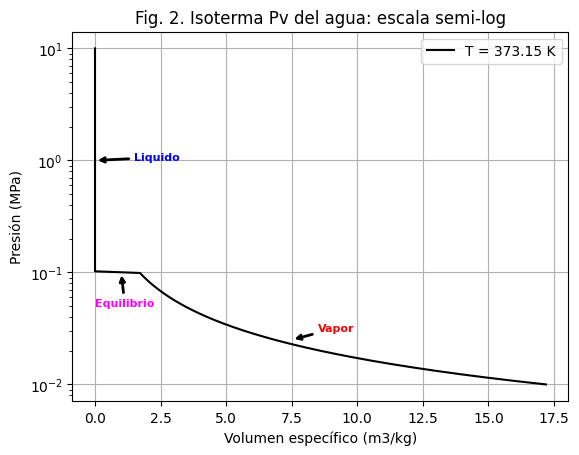

In [18]:
# Graficando isoterma T1 ampliada: diagrama Pv (semi-log)
titulo_fig_2 = "Fig. 2. Isoterma Pv del agua: escala semi-log"
config_diagrama_Pv(titulo_fig_2)
plt.plot(volumenes_T1, presiones, "-k", label="T = 373.15 K")
# Escalado log: eje vertical (P)
plt.yscale("log")
# Configurando anotaciones
estilo_anotacion = {
    "fontsize": 8,
    "fontweight": "semibold",
    "arrowprops": dict(linewidth=2, arrowstyle="->")
    }
plt.annotate("Liquido",
             xy=(0, 1), xytext=(1.5, 1),
             color="blue", **estilo_anotacion)
plt.annotate("Equilibrio",
             xy=(1, 0.1), xytext=(0, 0.05),
             color="magenta", **estilo_anotacion)
plt.annotate("Vapor",
             xy=(7.5, 0.025), xytext=(8.5, 0.03),
             color="red", **estilo_anotacion)
# Mostrar gráfico
plt.legend()
plt.show()

- P > 0.1 MPa --> Fase líquida
- P = 0.1 MPa --> Equilibrio líquido-vapor
- P < 0.1 MPa --> Fase vapor

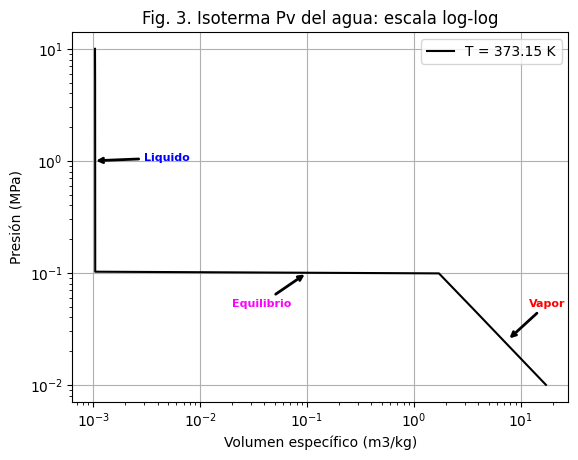

In [19]:
# Graficando isoterma T1 ampliada: diagrama Pv (escala log-log)
titulo_fig_3 = "Fig. 3. Isoterma Pv del agua: escala log-log"
config_diagrama_Pv(titulo_fig_3)
plt.plot(volumenes_T1, presiones, "-k", label="T = 373.15 K")
plt.xscale("log") # eje v
plt.yscale("log") # eje P
plt.annotate("Liquido",
             xy=(0.001, 1), xytext=(0.003, 1),
             color="blue", **estilo_anotacion)
plt.annotate("Equilibrio",
             xy=(0.1, 0.1), xytext=(0.02, 0.05),
             color="magenta", **estilo_anotacion)
plt.annotate("Vapor",
             xy=(7.5, 0.025), xytext=(12, 0.05),
             color="red", **estilo_anotacion)
# Mostrar gráfico
plt.legend()
plt.show()

Ahora se puede apreciar con más detalle la región de equilibrio líquido - vapor.

Nótese que, debido a la transformación logarítmica aplicada al volumen, la línea de vapor sobrecalentado se ve ahora como una recta (en lugar de una curva cóncava hacia arriba).

## Cálculo de isotermas

Hasta ahora, hemos visto cómo calcular 1 isoterma Pv y luego representarla, tanto en forma de tabla como gráficamente. Ahora, vamos a calcular más isotermas y ampliar aún más el rango de presiones, para construir finalmente un diagrama PvT extendido.

Es importante tener en cuenta las temperaturas del punto triple y del punto crítico, ya que delimitan regiones de fases en el diagrama.

Se elegirán las siguientes isotermas:
- T = 275 K (isoterma subcrítica; próxima al punto triple)
- T = 450 K (isoterma subcrítica; valor intermedio)
- T = 647 K (isoterma crítica)
- T = 800 K (isoterma supercrítica)

In [20]:
temperaturas = [275, 450, 647.096, 800]
# Pmin = 0.001 MPa (10^-3)
# Pmax = 100 MPa (10^2)
presiones = np.logspace(start=-3.21, stop=2, num=500)
volumenes = {T: calc_volumenes_isoterma(T, presiones) for T in temperaturas}

## Cálculos de equilibrio líquido - vapor

El cálculo de las líneas de saturación (equilibrio líquido-vapor) es importante, ya que éstas delimitan las regiones de cada fase en el diagrama Pv.

A continuación, se definen las funciones necesarias para calcular $v_L^{sat}$, $v_G^{sat}$ y $P^{sat}$ en función de la temperatura:

In [21]:
def calc_v_sat_Tx(T_sat: float, x: float) -> float:
    """Calcula el volumen específico `v` (m3/kg) del agua
    a la temperatura de saturación 'T_sat' (K) y fracción de vapor
    'x' especificadas"""
    estado_sat = IAPWS97(T=T_sat, x=x)
    return estado_sat.v

calc_volumenes_sat_Tx = np.vectorize(calc_v_sat_Tx)

In [22]:
def calc_P_sat(T: float) -> float:
    """Calcula la presión de saturación `P_sat` (MPa) del agua
    a la temperatura especificada `T` (K)"""
    estado_sat = IAPWS97(T=T, x=0)
    return estado_sat.P

calc_presiones_sat = np.vectorize(calc_P_sat)

El equilibrio líquido-vapor sólo es posible si $T_{triple} \le T \le T_{crit}$; por tanto, conviene calcular primero ambos puntos para representarlos también.

In [23]:
# Cálculo de punto crítico
T_crit = 647.096    # K
P_crit = calc_P_sat(T=T_crit)
v_crit = calc_v_sat_Tx(T_sat=T_crit, x=0)
# Cálculo de punto triple
T_triple = 273.16   # K
P_triple = calc_P_sat(T=T_triple)
vL_triple = calc_v_sat_Tx(T_sat=T_triple, x=0)
vG_triple = calc_v_sat_Tx(T_sat=T_triple, x=1)

In [24]:
# Cálculo de líneas de saturación
T_sat_data = np.linspace(T_triple, T_crit, 300)
P_sat_data = calc_presiones_sat(T_sat_data)
vL_sat_data = calc_volumenes_sat_Tx(T_sat_data, x=0)
vG_sat_data = calc_volumenes_sat_Tx(T_sat_data, x=1)

## Diagrama Pv

Finalmente, tenemos la data necesaria para representar el diagrama Pv del agua en un amplio rango de condiciones.

A continuación, se muestra cómo construir el gráfico:

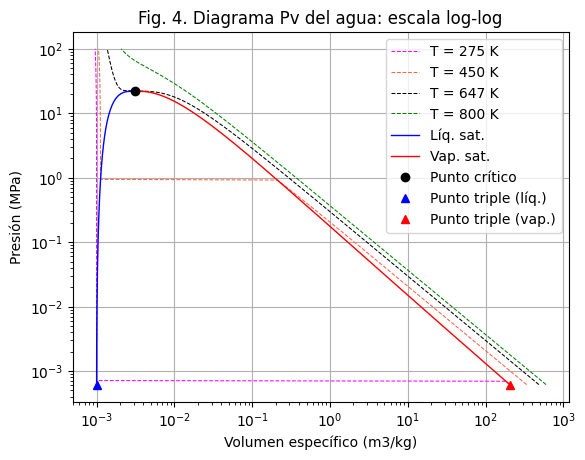

In [25]:
titulo_fig_4 = "Fig. 4. Diagrama Pv del agua: escala log-log"
config_diagrama_Pv(titulo_fig_4)
# Graficando isotermas
colores_isotermas = ["magenta", "tomato", "black", "green"]
for T, color in zip(temperaturas, colores_isotermas):
    plt.plot(
        volumenes[T],
        presiones,
        label=f"{T = :.0f} K",
        linewidth=0.75,
        linestyle="dashed",
        color=color
        )
# Graficando curvas de saturación
plt.plot(
    vL_sat_data, P_sat_data,
    "b", label='Líq. sat.', linewidth=1)
plt.plot(
    vG_sat_data, P_sat_data,
    "r", label='Vap. sat.', linewidth=1)
# Graficando punto crítico
plt.plot(v_crit, P_crit,
         "ok", label='Punto crítico')
# Graficando punto triple
plt.plot(vL_triple, P_triple,
         "^b", label='Punto triple (líq.)')
plt.plot(vG_triple, P_triple,
         "^r", label='Punto triple (vap.)')
# Escalado log-log
plt.xscale("log")
plt.yscale("log")
# Mostrar gráfico
plt.legend()
plt.show()

## Diagrama PT

Otra representación gráfica de interés es el **diagrama presión - temperatura**, también conocido como **diagrama de fases**. Como ya calculamos las líneas de saturación, podemos representar ahora sus coordenadas `(P, T)` en lugar de `(P, v)`. Aunque se pierde la información del volumen, se gana una mejor comprensión del comportamiento de fases.

Típicamente, se utilizan 3 versiones de este diagrama: P vs T, log P vs T y log P vs 1/T.

A continuación, definimos primero una función que podamos reutilizar para cada caso:

In [26]:
def graficar_diagrama_PT(
        P_data: np.ndarray,
        T_data: np.ndarray,
        titulo: str,
        horiz_tag: str = "T (K)",
        coord_liq: tuple[float, float] = (400, 2.5),
        coord_vap: tuple[float, float] = (550, 2.5),
        ):
    """Grafica un diagrama PT del agua en función de la línea de vaporización
    Args:
        P_dat (np.ndarray): arreglo con los valores de Psat (MPa)
        T_dat (np.ndarray): arreglo con los valores de T (K) ó 1/T (1/K)
        titulo (str): título de la figura
        horiz_tag (str): etiqueta del eje horizontal
        coord_liq (tuple[float, float]): coordenadas para etiquetar
            la fase líquida
        coord_liq (tuple[float, float]): coordenadas para etiquetar
            la fase líquida
    """
    plt.plot(T_data, P_data, "k", label="Curva de vaporización")
    plt.title(titulo)
    fuente = {"fontsize": 12, "fontweight": "semibold",}
    plt.xlabel(horiz_tag, **fuente)
    plt.ylabel("P (MPa)", **fuente)
    plt.annotate("Líquido", xy=coord_liq, color="blue", **fuente)
    plt.annotate("Vapor", xy=coord_vap, color="red", **fuente)
    plt.grid(True)

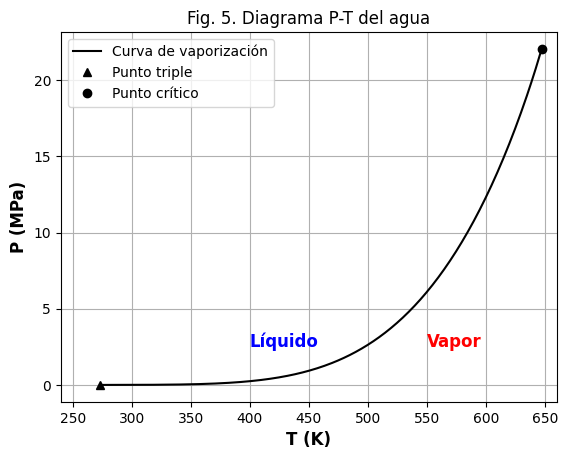

In [27]:
titulo_fig_5 = "Fig. 5. Diagrama P-T del agua"
graficar_diagrama_PT(P_sat_data, T_sat_data, titulo_fig_5)
plt.plot(T_triple, P_triple, '^k', label='Punto triple')
plt.plot(T_crit, P_crit, 'ok', label='Punto crítico')
plt.xlim(240, 660)
plt.legend()
plt.show()

Como se puede apreciar, la región a la izquierda de la curva de vaporización corresponde a la fase líquida, mientras que la región a la derecha representa la fase vapor. Nótese que la curva de vaporización inicia en el punto triple y termina en el punto crítico, como se había indicado previamente.

Una desventaja de la escala lineal de $P$ es que no podemos leer con precisión la región de bajas temperaturas (por ejemplo, T < 400 K). A continuación, graficaremos una representación semilogarítmica:

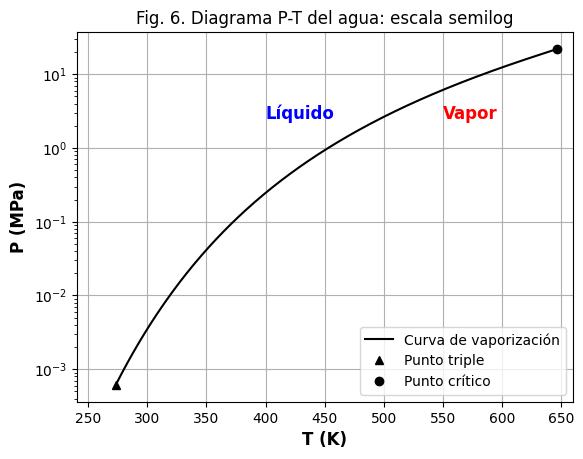

In [28]:
titulo_fig_6 = "Fig. 6. Diagrama P-T del agua: escala semilog"
graficar_diagrama_PT(P_sat_data, T_sat_data, titulo_fig_6)
plt.plot(T_triple, P_triple, '^k', label='Punto triple')
plt.plot(T_crit, P_crit, 'ok', label='Punto crítico')
plt.xlim(240, 660)
plt.yscale("log")
plt.legend(loc="lower right")
plt.show()

Nótese que la nueva gráfica ofrece una mejor representación para todo el rango de temperaturas. El cambio de la curvatura se debe al escalado logarítmico.

Ahora, vamos a cambiar el eje horizontal. En lugar de representar `T`, utilizaremos `1/T`. Esto implica cambiar las coordenadas de todos los puntos, incluyendo el punto triple y punto crítico, así como de las anotaciones.

A continuación, se muestra el procedimiento; preste atención a los nuevos argumentos de la función `graficar_diagrama_PT`:

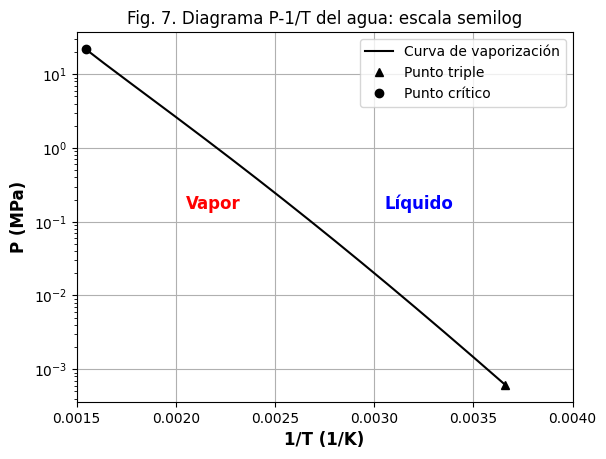

In [29]:
titulo_fig_7 = "Fig. 7. Diagrama P-1/T del agua: escala semilog"
graficar_diagrama_PT(
    P_data=P_sat_data,
    T_data=1/T_sat_data,
    titulo=titulo_fig_7,
    horiz_tag="1/T (1/K)",
    coord_liq=(0.00305, 0.15),
    coord_vap=(0.00205, 0.15),
    )
plt.plot(1/T_triple, P_triple, '^k', label='Punto triple')
plt.plot(1/T_crit, P_crit, 'ok', label='Punto crítico')
plt.xlim(0.0015, 0.0040)
plt.yscale("log")
plt.legend(loc="upper right")
plt.show()

Como podrá intuir, la razón de cambiar el eje horizontal fue linealizar la curva de vaporización. Las transformaciones de variables y cambios de escala son estrategias de uso común en Ciencia de Datos, y también son aplicables a la Ingeniería Química.

En este caso particular, se explica lo ocurrido a partir del modelo semi empírico de Clausius - Clapeyron de presión de saturación:

$$ \log P^{sat} = A - B/T$$

Si aplicamos los cambios de variables: $ y = \log P^{sat}; x = 1/T $, se obtiene la ecuación de una recta con pendiente negativa, lo cual es consistente con la tendencia observada en la fig. 7:
$$ y = A - Bx $$


## Conclusiones

- Python es un lenguaje de programación fácil de usar y con herramientas versátiles, aplicables tanto para la Ciencia de Datos como disciplinas de Ingeniería.
- La librería `iapws` permite calcular de forma rápida y exacta las propiedades termodinámicas del agua.
- La librería `NumPy` permite extender las capacidades de funciones de cálculo, aplicándolas para arreglos de datos de grandes dimensiones.
- La librería `pandas` permite estructurar y representar datos como tablas.
- La librería `Matplotlib` permite graficar conjuntos de datos, con varias funcionalidades para personalizar las figuras.
- Los cambios de variables y escala son estrategias útiles para el procesamiento de datos.
